In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

from citipy import citipy

# Import the API key
from config import weather_api_key

# Import datetime module
from datetime import datetime
import time

from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [5]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + weather_api_key

In [6]:
cities = list(cities)

In [7]:
#Create an empty list to hold the weather data.
city_data = []

print('Begining Data Retrieval  ')
print('----------------------------')

# Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city
    
    #log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']  
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H-%M:%S')
# Append the city info into city_data list
        city_data.append({'City': city.title(),
                     'Lat': city_lat,
                     'Lng': city_lng,
                     'Max Temp': city_max_temp,
                     'Humidity': city_humidity,
                     'Cloudiness': city_clouds,
                     'Wind Speed': city_wind,
                     'Country': city_country,
                     'Date': city_date})
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass
# Indicate the Data loading is Complete.
print('---------------------------------')
print('Data Retrieval Complete          ')
print('---------------------------------')

Begining Data Retrieval  
----------------------------
Processing Record 1 of set 1 | alexandria
Processing Record 2 of set 1 | coahuayana
Processing Record 3 of set 1 | severo-kurilsk
Processing Record 4 of set 1 | rikitea
Processing Record 5 of set 1 | cururupu
Processing Record 6 of set 1 | yellowknife
Processing Record 7 of set 1 | kodinsk
Processing Record 8 of set 1 | jardim
Processing Record 9 of set 1 | ushuaia
Processing Record 10 of set 1 | punta arenas
Processing Record 11 of set 1 | avarua
Processing Record 12 of set 1 | qaanaaq
Processing Record 13 of set 1 | nampula
Processing Record 14 of set 1 | leningradskiy
Processing Record 15 of set 1 | bluff
Processing Record 16 of set 1 | bredasdorp
Processing Record 17 of set 1 | yulara
Processing Record 18 of set 1 | shimoda
Processing Record 19 of set 1 | ilulissat
Processing Record 20 of set 1 | yagodnoye
Processing Record 21 of set 1 | saint-philippe
Processing Record 22 of set 1 | hamilton
Processing Record 23 of set 1 | bar

Processing Record 34 of set 4 | kununurra
Processing Record 35 of set 4 | vardo
Processing Record 36 of set 4 | san cristobal
Processing Record 37 of set 4 | mataura
Processing Record 38 of set 4 | couvin
Processing Record 39 of set 4 | khatanga
Processing Record 40 of set 4 | mojo
Processing Record 41 of set 4 | bam
Processing Record 42 of set 4 | grand gaube
Processing Record 43 of set 4 | sao filipe
Processing Record 44 of set 4 | san policarpo
Processing Record 45 of set 4 | dafeng
Processing Record 46 of set 4 | airai
Processing Record 47 of set 4 | valparaiso
Processing Record 48 of set 4 | safranbolu
Processing Record 49 of set 4 | ler
Processing Record 50 of set 4 | borujan
City not found. Skipping...
Processing Record 1 of set 5 | port-cartier
Processing Record 2 of set 5 | homer
Processing Record 3 of set 5 | bako
Processing Record 4 of set 5 | hilo
Processing Record 5 of set 5 | chokurdakh
Processing Record 6 of set 5 | saint-lo
Processing Record 7 of set 5 | paita
Processin

Processing Record 28 of set 8 | havre
Processing Record 29 of set 8 | sakaraha
Processing Record 30 of set 8 | flin flon
Processing Record 31 of set 8 | tokmak
Processing Record 32 of set 8 | olafsvik
Processing Record 33 of set 8 | kuching
Processing Record 34 of set 8 | voyvozh
Processing Record 35 of set 8 | panaba
Processing Record 36 of set 8 | grand river south east
City not found. Skipping...
Processing Record 37 of set 8 | axim
Processing Record 38 of set 8 | alegrete
Processing Record 39 of set 8 | kahului
Processing Record 40 of set 8 | sale
Processing Record 41 of set 8 | rudbar
Processing Record 42 of set 8 | rinconada
Processing Record 43 of set 8 | ponta do sol
Processing Record 44 of set 8 | araouane
Processing Record 45 of set 8 | nara
Processing Record 46 of set 8 | denpasar
Processing Record 47 of set 8 | siderno
Processing Record 48 of set 8 | nkhotakota
Processing Record 49 of set 8 | ixtapa
Processing Record 50 of set 8 | mopti
Processing Record 1 of set 9 | matay


Processing Record 14 of set 12 | santa ana arriba
Processing Record 15 of set 12 | emporia
Processing Record 16 of set 12 | komsomolskiy
Processing Record 17 of set 12 | maningrida
Processing Record 18 of set 12 | slupsk
Processing Record 19 of set 12 | kijang
Processing Record 20 of set 12 | alta floresta
Processing Record 21 of set 12 | krasnoselkup
Processing Record 22 of set 12 | yaan
Processing Record 23 of set 12 | mtimbira
Processing Record 24 of set 12 | sajanan
Processing Record 25 of set 12 | nizhniy tsasuchey
Processing Record 26 of set 12 | banikoara
Processing Record 27 of set 12 | sobolevo
Processing Record 28 of set 12 | leh
Processing Record 29 of set 12 | bardsir
Processing Record 30 of set 12 | dong hoi
Processing Record 31 of set 12 | ekhabi
Processing Record 32 of set 12 | kieta
Processing Record 33 of set 12 | talnakh
Processing Record 34 of set 12 | gambela
Processing Record 35 of set 12 | san luis
Processing Record 36 of set 12 | demidov
Processing Record 37 of s

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alexandria,31.22,29.96,64.40,82,0,8.05,EG,2020-04-18 05-45:48
1,Coahuayana,18.73,-103.68,76.05,49,66,3.22,MX,2020-04-18 05-45:49
2,Severo-Kurilsk,50.68,156.12,33.30,90,6,13.29,RU,2020-04-18 05-45:49
3,Rikitea,-23.12,-134.97,77.14,67,0,5.32,PF,2020-04-18 05-45:50
4,Cururupu,-1.83,-44.87,75.58,92,100,1.74,BR,2020-04-18 05-45:50
5,Yellowknife,62.46,-114.35,21.20,53,90,6.93,CA,2020-04-18 05-45:51
6,Kodinsk,58.69,99.18,38.55,66,79,7.58,RU,2020-04-18 05-45:51
7,Jardim,-21.48,-56.14,57.02,66,41,1.25,BR,2020-04-18 05-45:51
8,Ushuaia,-54.80,-68.30,50.00,78,20,6.93,AR,2020-04-18 05-45:52
9,Punta Arenas,-53.15,-70.92,46.40,75,40,20.80,CL,2020-04-18 05-44:10


In [9]:
# Reorder columns
new_column_order = ['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alexandria,EG,2020-04-18 05-45:48,31.22,29.96,64.40,82,0,8.05
1,Coahuayana,MX,2020-04-18 05-45:49,18.73,-103.68,76.05,49,66,3.22
2,Severo-Kurilsk,RU,2020-04-18 05-45:49,50.68,156.12,33.30,90,6,13.29
3,Rikitea,PF,2020-04-18 05-45:50,-23.12,-134.97,77.14,67,0,5.32
4,Cururupu,BR,2020-04-18 05-45:50,-1.83,-44.87,75.58,92,100,1.74
...,...,...,...,...,...,...,...,...,...
543,Cajati,BR,2020-04-18 05-50:45,-24.74,-48.12,60.48,83,56,2.26
544,Saryg-Sep,RU,2020-04-18 05-50:46,51.50,95.60,48.06,31,34,6.06
545,Miri,MY,2020-04-18 05-50:46,4.41,114.01,89.60,79,75,6.93
546,Saint-Ambroise,CA,2020-04-18 05-50:47,48.55,-71.33,24.01,73,65,2.30


In [10]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# 6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

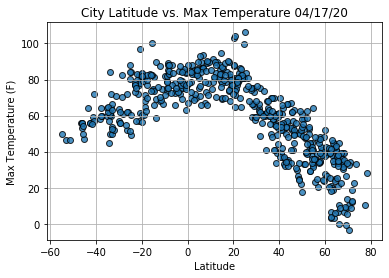

In [12]:
# Build the scatter plot for latitude vs. max temp.
plt.scatter(lats,
           max_temps,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

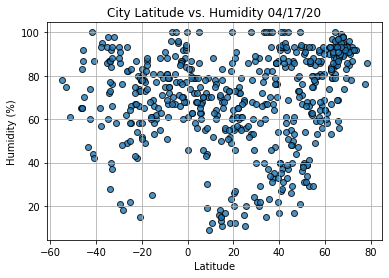

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

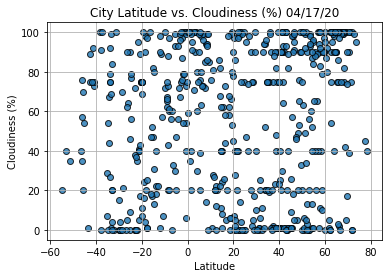

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

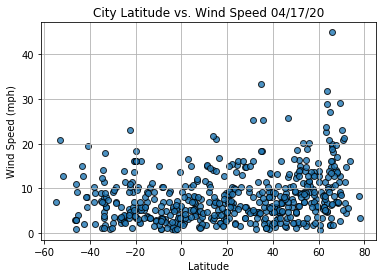

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor='k', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save Figure
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

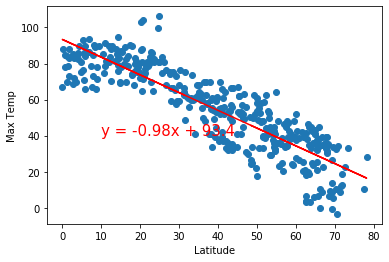

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

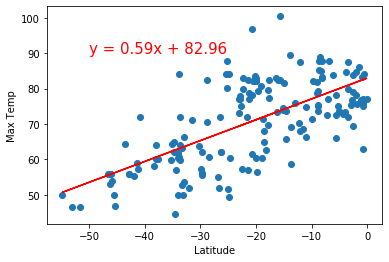

In [33]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

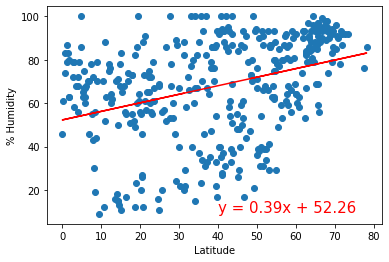

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

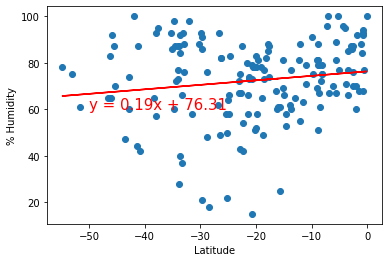

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,60))

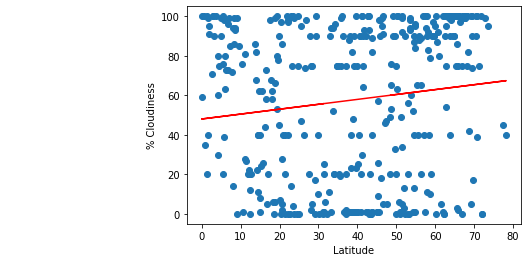

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

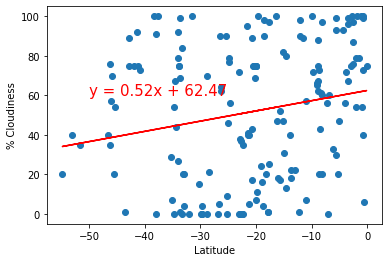

In [37]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

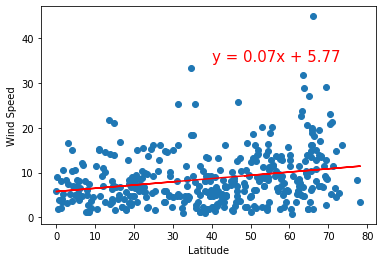

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

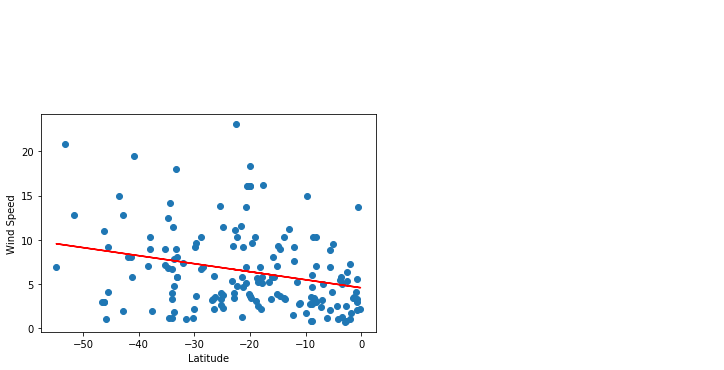

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))